Loading data for TSLA...
Training ARIMA model for TSLA...
Training SARIMA model for TSLA...
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.27094D+00    |proj g|=  4.81023D-02


 This problem is unconstrained.



At iterate    5    f=  3.19424D+00    |proj g|=  2.33107D-02

At iterate   10    f=  3.18904D+00    |proj g|=  3.10766D-02

At iterate   15    f=  3.18400D+00    |proj g|=  8.24902D-03

At iterate   20    f=  3.18369D+00    |proj g|=  6.65466D-04

At iterate   25    f=  3.18368D+00    |proj g|=  1.10665D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     28     34      1     0     0   2.665D-05   3.184D+00
  F =   3.1836807346662521     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

ARIMA Model Evaluation for TSLA:

SARIMA Model Evaluation for TSLA:


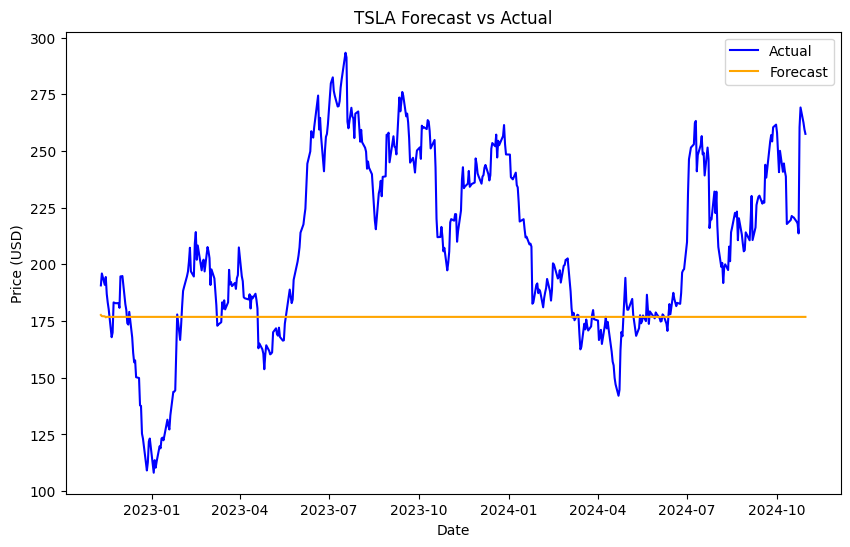

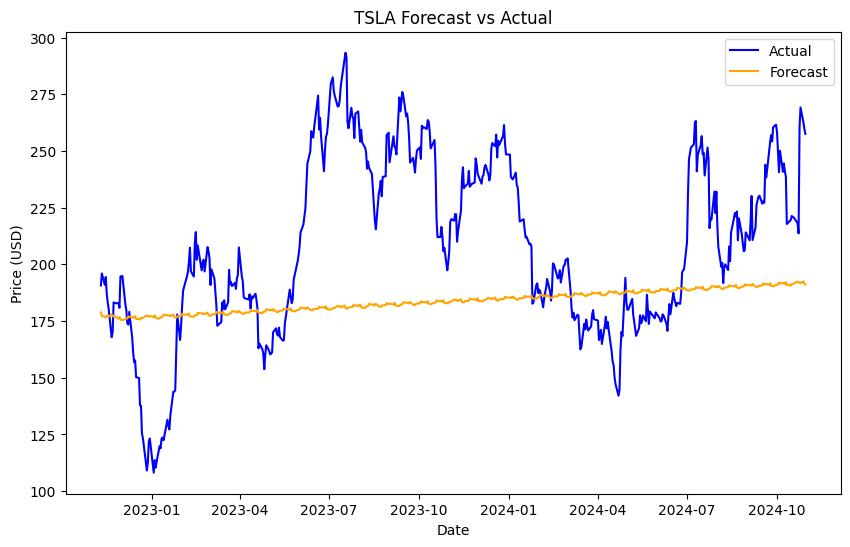

Loading data for BND...
Training ARIMA model for BND...
Training SARIMA model for BND...
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.37130D-01    |proj g|=  1.13379D+00


 This problem is unconstrained.



At iterate    5    f=  1.62927D-01    |proj g|=  2.36183D-01

At iterate   10    f=  1.41432D-01    |proj g|=  2.74790D-01

At iterate   15    f=  1.07650D-01    |proj g|=  4.85427D-02

At iterate   20    f=  1.06136D-01    |proj g|=  6.15222D-03

At iterate   25    f=  1.05946D-01    |proj g|=  9.22899D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     27     32      1     0     0   8.522D-05   1.059D-01
  F =  0.10594577298073474     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

ARIMA Model Evaluation for BND:

SARIMA Model Evaluation for BND:


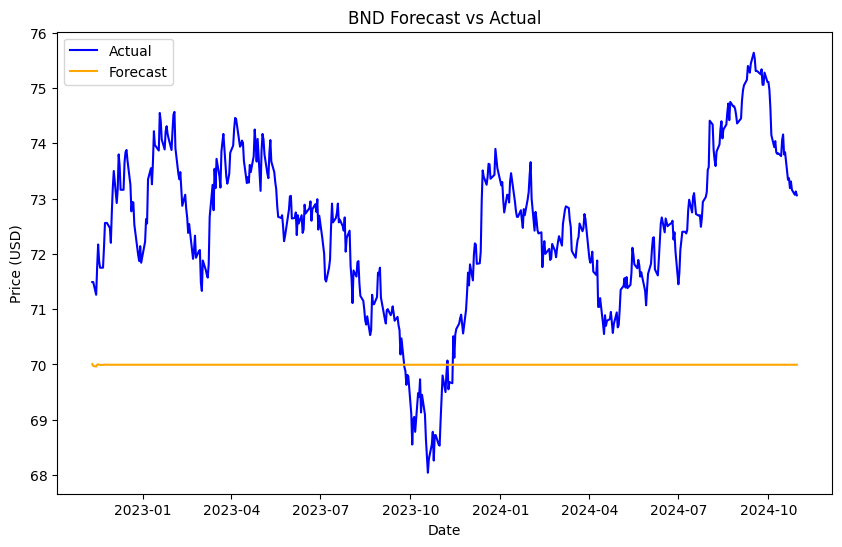

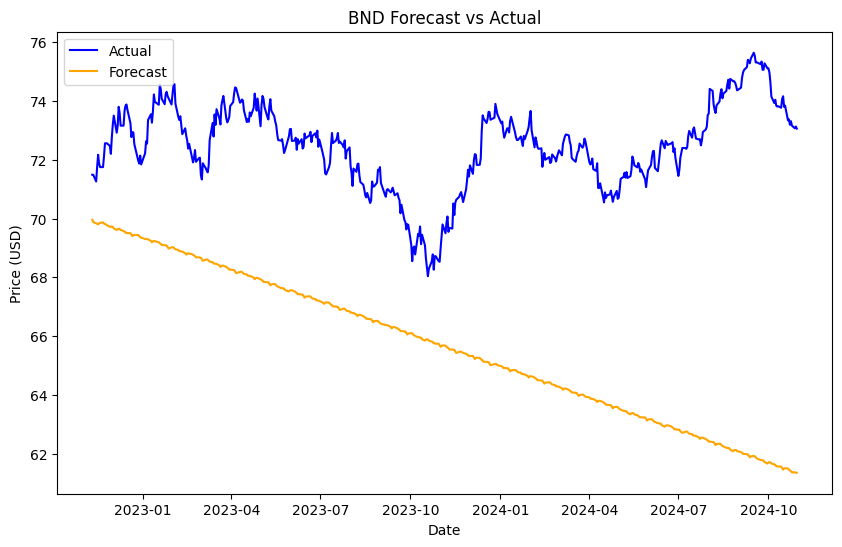

Loading data for SPY...
Training ARIMA model for SPY...
Training SARIMA model for SPY...


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.97230D+00    |proj g|=  6.02464D-02

At iterate    5    f=  2.93887D+00    |proj g|=  9.99648D-03

At iterate   10    f=  2.93148D+00    |proj g|=  5.91847D-03

At iterate   15    f=  2.93004D+00    |proj g|=  1.44810D-03

At iterate   20    f=  2.92994D+00    |proj g|=  4.80029D-04

At iterate   25    f=  2.92993D+00    |proj g|=  1.92569D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     26     29      1     0     0   

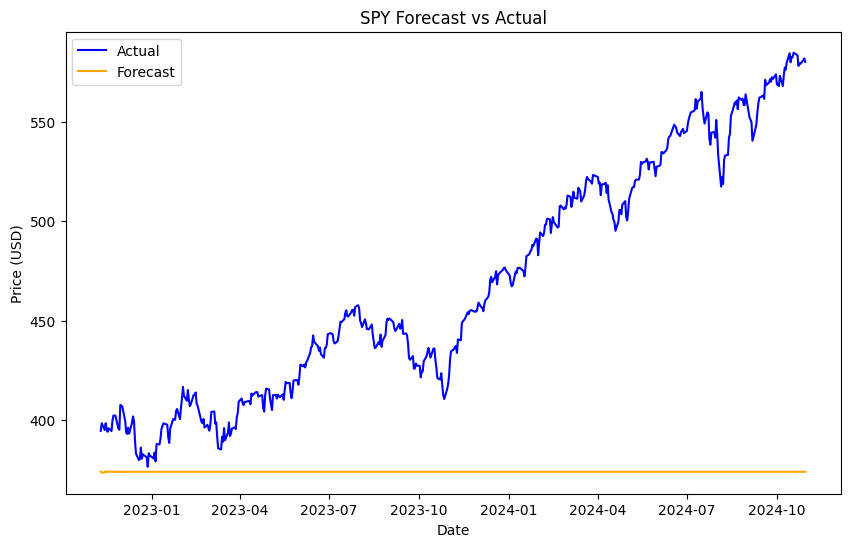

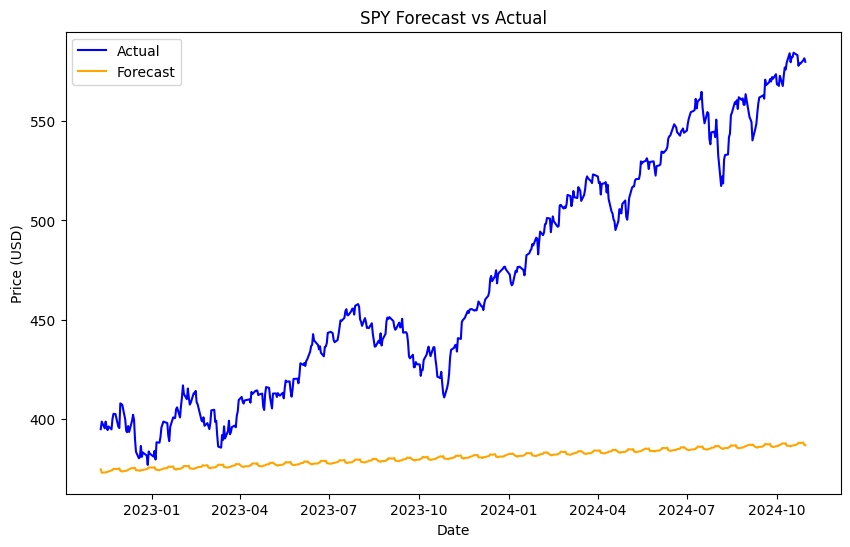


Forecasting Summary:

TSLA:
ARIMA: {'MAE': 39.33038601184988, 'RMSE': 49.58507592783839, 'MAPE': nan}
SARIMA: {'MAE': 35.60425040320082, 'RMSE': 44.74034429785665, 'MAPE': nan}

BND:
ARIMA: {'MAE': 2.580942752828737, 'RMSE': 2.8603661445588773, 'MAPE': nan}
SARIMA: {'MAE': 6.813176732248066, 'RMSE': 7.442702607121435, 'MAPE': nan}

SPY:
ARIMA: {'MAE': 94.64019732850339, 'RMSE': 111.82873091134311, 'MAPE': nan}
SARIMA: {'MAE': 88.36770300778116, 'RMSE': 104.52464310962569, 'MAPE': nan}


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings

warnings.filterwarnings("ignore")
# Function to split data into train and test
def split_data(series: pd.Series, test_size: float = 0.2):
    """
    Splits time series data into training and testing sets.
    
    Args:
        series (pd.Series): The time series data.
        test_size (float): Fraction of data to use for testing.
    
    Returns:
        tuple: Training and testing data.
    """
    split_idx = int(len(series) * (1 - test_size))
    train_data = series[:split_idx]
    test_data = series[split_idx:]
    return train_data, test_data

# Function to train ARIMA model
def train_arima(train_data: pd.Series, order=(5, 1, 0)):
    """
    Trains an ARIMA model.
    
    Args:
        train_data (pd.Series): Training data.
        order (tuple): ARIMA model order (p, d, q).
    
    Returns:
        ARIMA: Trained ARIMA model.
    """
    model = ARIMA(train_data, order=order)
    return model.fit()

# Function to train SARIMA model
def train_sarima(train_data: pd.Series, order=(5, 1, 0), seasonal_order=(1, 1, 1, 12)):
    """
    Trains a SARIMA model.
    
    Args:
        train_data (pd.Series): Training data.
        order (tuple): ARIMA model order (p, d, q).
        seasonal_order (tuple): SARIMA seasonal order (P, D, Q, s).
    
    Returns:
        SARIMAX: Trained SARIMA model.
    """
    model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order)
    return model.fit()

# Function to evaluate model performance
def evaluate_model(model, test_data: pd.Series, forecast):
    """
    Evaluates model performance using MAE, RMSE, and MAPE.
    
    Args:
        model: Trained model.
        test_data (pd.Series): Testing data.
        forecast: Forecasted values.
    
    Returns:
        dict: Evaluation metrics.
    """
    mae = mean_absolute_error(test_data, forecast)
    rmse = np.sqrt(mean_squared_error(test_data, forecast))
    mape = np.mean(np.abs((test_data - forecast) / test_data)) * 100

    return {"MAE": mae, "RMSE": rmse, "MAPE": mape}

# Function to plot forecast vs actual values
def plot_forecast(data: pd.DataFrame, forecast, test_data: pd.Series, ticker: str):
    """
    Plots the actual and forecasted values.
    
    Args:
        data (pd.DataFrame): Original data.
        forecast: Forecasted values.
        test_data (pd.Series): Testing data.
        ticker (str): Stock ticker for labeling.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(data.index[-len(test_data):], test_data, label='Actual', color='blue')
    plt.plot(data.index[-len(test_data):], forecast, label='Forecast', color='orange')
    plt.title(f"{ticker} Forecast vs Actual")
    plt.xlabel("Date")
    plt.ylabel("Price (USD)")
    plt.legend()
    plt.show()

# Load pre-processed data
def load_preprocessed_data(filename: str) -> pd.DataFrame:
    """
    Load pre-processed data from a CSV file.
    
    Args:
        filename (str): Path to the CSV file.
    
    Returns:
        pd.DataFrame: Loaded DataFrame.
    """
    return pd.read_csv(filename, index_col="Date", parse_dates=True)

# Data cleaning function
def clean_data(series: pd.Series) -> pd.Series:
    """
    Cleans the data by ensuring it is numeric and handling missing values.
    
    Args:
        series (pd.Series): The time series data.
    
    Returns:
        pd.Series: Cleaned time series data.
    """
    series = pd.to_numeric(series, errors='coerce')  # Convert non-numeric to NaN
    series = series.fillna(series.mean())  # Replace NaNs with the mean value
    return series

if __name__ == "__main__":
    # Define stock tickers and file paths
    tickers = {"TSLA": "Tesla", "BND": "Vanguard Total Bond Market ETF", "SPY": "S&P 500 ETF"}
    forecast_results = {}

    for ticker in tickers:
        # Load the saved processed data for this ticker
        print(f"Loading data for {ticker}...")
        filename = f"{ticker}_processed.csv"  # Pre-processed file
        data = load_preprocessed_data(filename)

        # Extract and clean the Close price for forecasting
        close_prices = clean_data(data['Close'])

        # Split data into train and test
        train_data, test_data = split_data(close_prices, test_size=0.2)

        # Train ARIMA model
        print(f"Training ARIMA model for {ticker}...")
        arima_model = train_arima(train_data, order=(5, 1, 0))
        arima_forecast = arima_model.forecast(steps=len(test_data))

        # Train SARIMA model
        print(f"Training SARIMA model for {ticker}...")
        sarima_model = train_sarima(train_data, order=(5, 1, 0), seasonal_order=(1, 1, 1, 12))
        sarima_forecast = sarima_model.forecast(steps=len(test_data))

        # Evaluate models
        print(f"\nARIMA Model Evaluation for {ticker}:")
        arima_metrics = evaluate_model(arima_model, test_data, arima_forecast)

        print(f"\nSARIMA Model Evaluation for {ticker}:")
        sarima_metrics = evaluate_model(sarima_model, test_data, sarima_forecast)

        # Store results for later comparison
        forecast_results[ticker] = {
            "ARIMA": arima_metrics,
            "SARIMA": sarima_metrics
        }

        # Plot forecast vs actual
        plot_forecast(data, arima_forecast, test_data, ticker)
        plot_forecast(data, sarima_forecast, test_data, ticker)

    # Summary of results
    print("\nForecasting Summary:")
    for ticker, metrics in forecast_results.items():
        print(f"\n{ticker}:")
        print(f"ARIMA: {metrics['ARIMA']}")
        print(f"SARIMA: {metrics['SARIMA']}")
